Code for Volume,Speed-RL Algo

This code implements a simple traffic signal control problem and calculates the optimal policy using the value iteration algorithm. The goal is to determine the best action (green light direction) for each state (traffic conditions) to maximize the cumulative rewards.

In [ ]:
import random

data = []
for i in range(10):
    volume = random.randint(0, 100)
    speed = random.uniform(0, 60)
    status = i % 2  # alternates between 0 and 1
    data.append((volume, speed, status))

states = set(data)
print(states)

{(64, 25.58901176354252, 1), (97, 22.990127392787013, 1), (68, 59.35207008087116, 1), (28, 5.884617085590125, 1), (26, 16.671141327989933, 0), (2, 51.14684102579259, 1), (18, 45.511067412930274, 0), (62, 13.983633222795524, 0), (65, 52.868298219470844, 0), (97, 39.545399150111315, 0)}


In [ ]:
actions = {'green for NS direction', 'green for EW direction'}

print(actions)

{'green for EW direction', 'green for NS direction'}


In [ ]:
transitions = {}
for state in states:
    for action in actions:
        # Calculate the possible next states
        next_states = []
        if action == 'green for NS direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[0] >= state[0] and next_state[2] == 0:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            # Add the transition probability to the dictionary
            transitions[(state, action, next_state)] = p
        elif action == 'green for EW direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[1] >= state[1] and next_state[2] == 1:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            # Add the transition probability to the dictionary
            transitions[(state, action, next_state)] = p

print(transitions)

{((64, 25.58901176354252, 1), 'green for EW direction', (97, 39.545399150111315, 0)): 0.3333333333333333, ((64, 25.58901176354252, 1), 'green for NS direction', (97, 39.545399150111315, 0)): 0.5, ((97, 22.990127392787013, 1), 'green for EW direction', (97, 39.545399150111315, 0)): 0.25, ((97, 22.990127392787013, 1), 'green for NS direction', (97, 39.545399150111315, 0)): 1.0, ((68, 59.35207008087116, 1), 'green for EW direction', (97, 39.545399150111315, 0)): 1.0, ((68, 59.35207008087116, 1), 'green for NS direction', (97, 39.545399150111315, 0)): 1.0, ((28, 5.884617085590125, 1), 'green for EW direction', (97, 39.545399150111315, 0)): 0.2, ((28, 5.884617085590125, 1), 'green for NS direction', (97, 39.545399150111315, 0)): 0.3333333333333333, ((26, 16.671141327989933, 0), 'green for EW direction', (97, 39.545399150111315, 0)): 0.25, ((26, 16.671141327989933, 0), 'green for NS direction', (97, 39.545399150111315, 0)): 0.25, ((2, 51.14684102579259, 1), 'green for EW direction', (97, 39.

In [ ]:
rewards = {}
for state in states:
    for action in actions:
        # Calculate the possible next states
        next_states = []
        if action == 'green for NS direction':
            # Calculate the probability of transitioning to each possible next state
            # Checks if the next state is reachable from the current state by moving North-South
            #and the intersection is not currently allowing East-West traffic to pass through.
            for next_state in states:
                if next_state[0] >= state[0] and next_state[2] == 0:
                    next_states.append(next_state)
            # Define the reward for each possible next state
            for next_state in next_states:
                r = 10
                if next_state[2] == 1:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                # Add the reward to the dictionary
                rewards[(state, action, next_state)] = r
        elif action == 'green for EW direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[1] >= state[1] and next_state[2] == 1:
                    next_states.append(next_state)
            # Define the reward for each possible next state
            for next_state in next_states:
                r = 10
                if next_state[2] == 0:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                # Add the reward to the dictionary
                rewards[(state, action, next_state)] = r

print(rewards)

{((64, 25.58901176354252, 1), 'green for EW direction', (64, 25.58901176354252, 1)): 3.3441098823645743, ((64, 25.58901176354252, 1), 'green for EW direction', (68, 59.35207008087116, 1)): 2.606479299191288, ((64, 25.58901176354252, 1), 'green for EW direction', (2, 51.14684102579259, 1)): 9.288531589742075, ((64, 25.58901176354252, 1), 'green for NS direction', (65, 52.868298219470844, 0)): 2.9713170178052914, ((64, 25.58901176354252, 1), 'green for NS direction', (97, 39.545399150111315, 0)): -0.09545399150111422, ((97, 22.990127392787013, 1), 'green for EW direction', (64, 25.58901176354252, 1)): 3.3441098823645743, ((97, 22.990127392787013, 1), 'green for EW direction', (97, 22.990127392787013, 1)): 0.0700987260721288, ((97, 22.990127392787013, 1), 'green for EW direction', (68, 59.35207008087116, 1)): 2.606479299191288, ((97, 22.990127392787013, 1), 'green for EW direction', (2, 51.14684102579259, 1)): 9.288531589742075, ((97, 22.990127392787013, 1), 'green for NS direction', (97,

In [ ]:
gamma = 0.8
convergence_threshold = 0.0001

In [ ]:
V = {state: 0 for state in states}
while True:
    delta = 0
    for state in states:
        v = V[state]
        max_value = float('-inf')
        for action in actions:
            action_value = 0
            for next_state, probability in transitions.get((state, action), {}).items():
                action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
            if action_value > max_value:
                max_value = action_value
                best_action = action
        V[state] = max_value
        delta = max(delta, abs(v - V[state]))
    if delta < convergence_threshold:
        break

# Extract the optimal policy
policy = {}
for state in states:
    max_value = float('-inf')
    for action in actions:
        action_value = 0
        for next_state, probability in transitions.get((state, action), {}).items():
            action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
        if action_value > max_value:
            max_value = action_value
            best_action = action
    policy[state] = best_action

print(policy)

{(64, 25.58901176354252, 1): 'green for EW direction', (97, 22.990127392787013, 1): 'green for EW direction', (68, 59.35207008087116, 1): 'green for EW direction', (28, 5.884617085590125, 1): 'green for EW direction', (26, 16.671141327989933, 0): 'green for EW direction', (2, 51.14684102579259, 1): 'green for EW direction', (18, 45.511067412930274, 0): 'green for EW direction', (62, 13.983633222795524, 0): 'green for EW direction', (65, 52.868298219470844, 0): 'green for EW direction', (97, 39.545399150111315, 0): 'green for EW direction'}


In [ ]:
import pandas as pd

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume', 'Speed', 'Status', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume'] = state[0]
    df.loc[i, 'Speed'] = state[1]
    df.loc[i, 'Status'] = 'NS' if state[2] == 0 else 'EW'
    df.loc[i, 'Optimal Action'] = policy[state]

print(df)

  Volume      Speed Status          Optimal Action
0     64  25.589012     EW  green for EW direction
1     97  22.990127     EW  green for EW direction
2     68   59.35207     EW  green for EW direction
3     28   5.884617     EW  green for EW direction
4     26  16.671141     NS  green for EW direction
5      2  51.146841     EW  green for EW direction
6     18  45.511067     NS  green for EW direction
7     62  13.983633     NS  green for EW direction
8     65  52.868298     NS  green for EW direction
9     97  39.545399     NS  green for EW direction


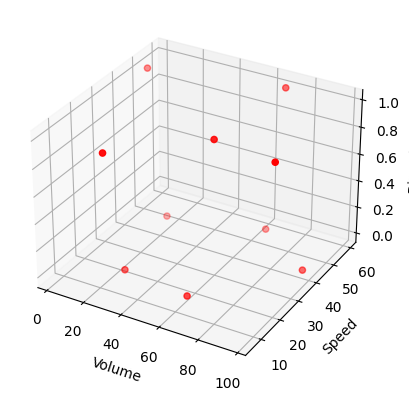

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the data from the DataFrame
x = df['Volume']
y = df['Speed']
z = [0 if s == 'NS' else 1 for s in df['Status']]  # Convert direction to a numerical value (0 or 1)
colors = ['green' if a == 'green for NS direction' else 'red' for a in df['Optimal Action']]  # Color based on optimal action

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors)

# Set the axis labels
ax.set_xlabel('Volume')
ax.set_ylabel('Speed')
ax.set_zlabel('Direction')

plt.show()

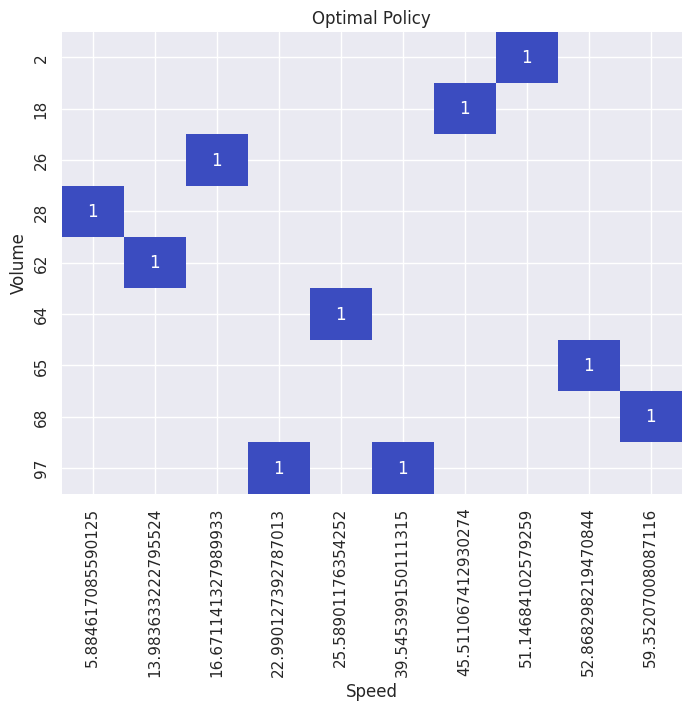

In [ ]:
import pandas as pd

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume', 'Speed', 'Status', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume'] = state[0]
    df.loc[i, 'Speed'] = state[1]
    df.loc[i, 'Status'] = 'NS' if state[2] == 0 else 'EW'
    df.loc[i, 'Optimal Action'] = policy[state]

# Map the actions to numeric values for the heatmap
action_map = {'green for NS direction': 0, 'green for EW direction': 1}
df['Optimal Action'] = df['Optimal Action'].map(action_map)

# Create a pivot table to prepare the data for the heatmap
pivot = df.pivot_table(values='Optimal Action', index='Volume', columns='Speed')

# Create the heatmap using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, cbar=False)
plt.title('Optimal Policy')
plt.show()

HeatMaps

In [4]:
!pip install ultralytics

  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (21.1 MB)


In [ ]:
from collections import defaultdict
import cv2
import numpy as np
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 60.3MB/s]


In [ ]:
videopath = '/Path/Road traffic video.mp4'
cap = cv2.VideoCapture(videopath)

In [ ]:
track_history = defaultdict(lambda: [])
last_positions = {}

In [ ]:
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [ ]:
heatmap = np.zeros((int(cap.get(4)), int(cap.get(3)), 3), dtype=np.float32)

In [1]:
!pip install folium

In [ ]:
from google.colab import drive
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive


# Load YOLO model
model = YOLO('yolov8m.pt')  # Adjust the YOLO model file path

# Path to the video file
video_path = '/content/bombay_traffic.mp4'  # Adjust the video file path

# Open the video file
cap = cv2.VideoCapture(video_path)

cap = cv2.VideoCapture(video_path)

# Initialize counts
frame_count = 0
vehicle_count = []

# Loop through each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Initialize font and count for annotations
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    count = 1

    # Loop through the detections and annotate the frame
    for detection in results[0].pred:
      x1, y1, x2, y2, class_id, conf = detection.tolist()
      x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
      text_x = (x1 + x2) // 2
      text_y = (y1 + y2) // 2
      cv2.putText(frame, str(count), (text_x, text_y), font, font_scale, (255, 255, 255), 1, cv2.LINE_AA)
      count += 1

    # Count the number of vehicles detected in this frame
    count = len(results.pred[0])
    vehicle_count.append(count)

    # Display the frame with annotations
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_count += 1

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

# Check if any vehicles were detected
if vehicle_count:
    # Generate heatmap
    heatmap, _ = np.histogram(vehicle_count, bins=np.arange(max(vehicle_count) + 1))
    heatmap = heatmap.reshape(1, -1)

    # Plot heatmap
    plt.figure(figsize=(10, 5))
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.xlabel('Frame')
    plt.ylabel('Vehicle Count')
    plt.title('Vehicle Detection Heatmap')
    plt.colorbar()
    plt.show()
else:
    print("No vehicles were detected in the video.")


0: 384x640 18 cars, 1 bus, 5 trucks, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


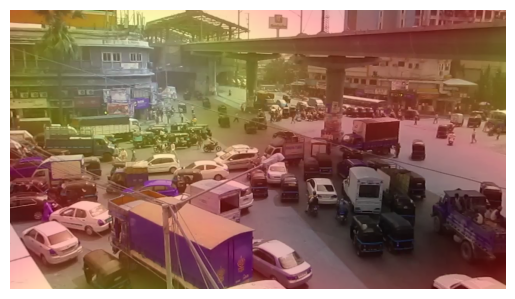


0: 384x640 18 cars, 2 buss, 5 trucks, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


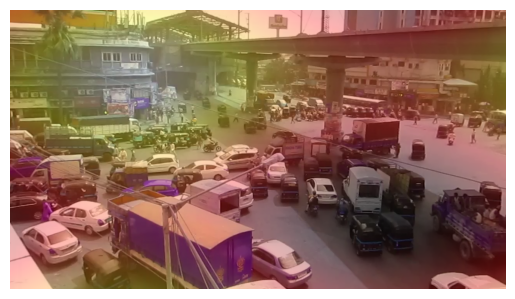


0: 384x640 19 cars, 2 buss, 5 trucks, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


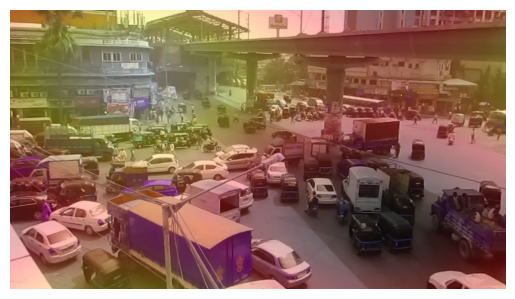


0: 384x640 20 cars, 2 buss, 5 trucks, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


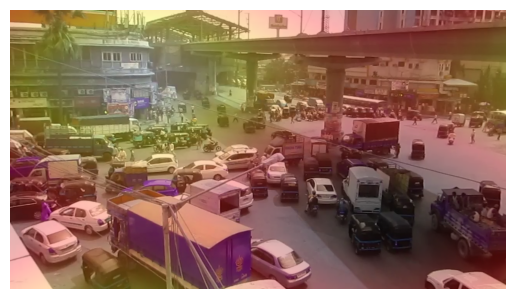


0: 384x640 20 cars, 2 buss, 5 trucks, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


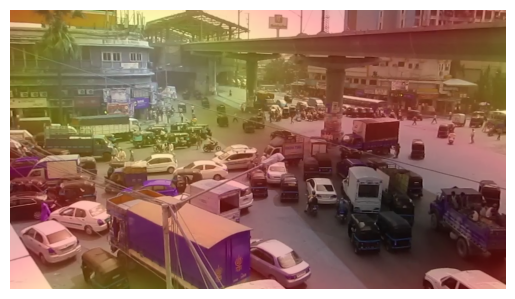


0: 384x640 19 cars, 2 buss, 5 trucks, 16.2ms
Speed: 2.0ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


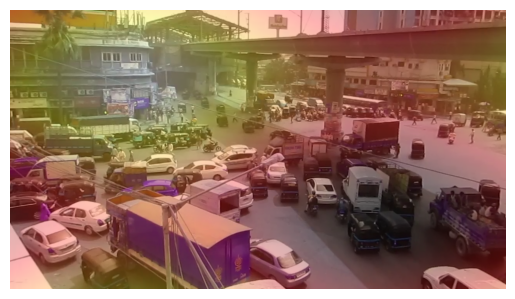


0: 384x640 20 cars, 2 buss, 5 trucks, 10.8ms
Speed: 2.2ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


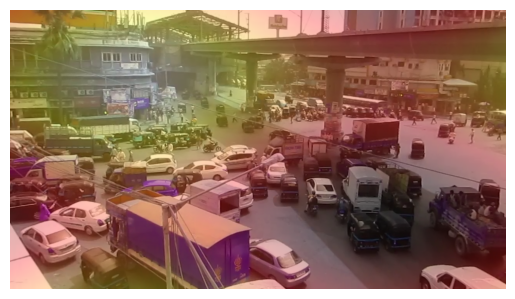


0: 384x640 18 cars, 2 buss, 5 trucks, 11.7ms
Speed: 2.3ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


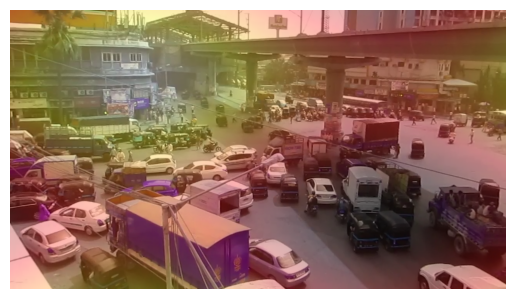


0: 384x640 20 cars, 2 buss, 5 trucks, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


KeyboardInterrupt: 

In [26]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Create a queue to store the detected vehicle locations
vehicle_locations = deque(maxlen=100)

# Create a function to generate the heatmap with wavy regions
def generate_heatmap(frame, vehicle_locations):
    # Create a blank heatmap
    heatmap = np.zeros_like(frame[:,:,0], dtype=np.float32)

    # Loop through the vehicle locations and accumulate them on the heatmap
    for x, y in vehicle_locations:
        heatmap[y, x] += 1

    # Apply Gaussian blur to smooth out the heatmap
    heatmap = cv2.GaussianBlur(heatmap, (0, 0), sigmaX=5, sigmaY=5)

    # Create a sine wave pattern to add wavy regions to the heatmap
    x = np.linspace(0, 2*np.pi, heatmap.shape[1])
    y = np.linspace(0, 2*np.pi, heatmap.shape[0])
    X, Y = np.meshgrid(x, y)
    sine_wave = (np.sin(X) + np.sin(Y)) * 50

    # Add the sine wave pattern to the heatmap
    heatmap += sine_wave

    # Normalize the heatmap
    heatmap = cv2.normalize(heatmap, None, 0, 1, cv2.NORM_MINMAX)

    # Apply colormap
    heatmap = cv2.applyColorMap((heatmap * 255).astype(np.uint8), cv2.COLORMAP_HOT)

    # Convert to BGR
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Combine the heatmap with the original frame
    output = cv2.addWeighted(frame, 0.7, heatmap, 0.3, 0)

    return output

# Open the video file
cap = cv2.VideoCapture("/content/bombay.mp4")  # Update with your video file path

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(cap.get(3)),int(cap.get(4))))

# Number of frames to accumulate vehicle locations
accumulation_frames = 10
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Detect vehicles in the frame using YOLOv8
    results = model(frame)
    boxes = results[0].boxes

    # Clear the previous vehicle locations every accumulation_frames
    if frame_count % accumulation_frames == 0:
        vehicle_locations.clear()

    # Loop through the detected vehicles and store their locations
    for box in boxes:
        if box.cls == 2 or box.cls == 7:  # Class 2: Car, Class 7: Truck
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            vehicle_locations.append((center_x, center_y))

    # Generate the heatmap with wavy regions and display the output
    output = generate_heatmap(frame, vehicle_locations)
    plt.imshow(output)
    plt.axis('off')
    plt.show()
    out.write(output) # write the frame to output video

    frame_count += 1

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 18 cars, 1 bus, 5 trucks, 29.4ms
Speed: 2.0ms preprocess, 29.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


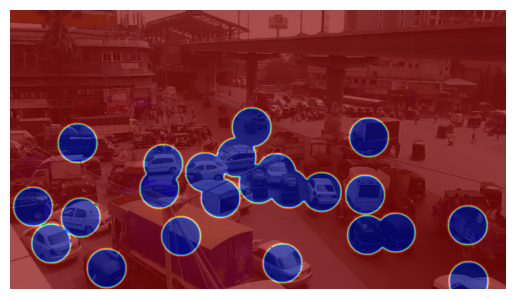


0: 384x640 18 cars, 2 buss, 5 trucks, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


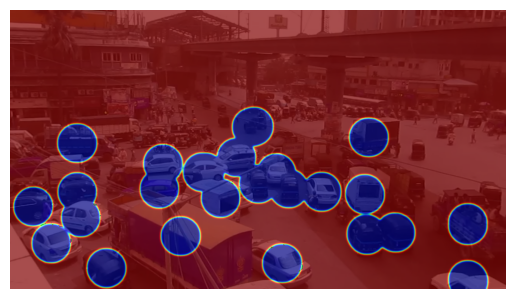


0: 384x640 19 cars, 2 buss, 5 trucks, 23.9ms
Speed: 2.1ms preprocess, 23.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


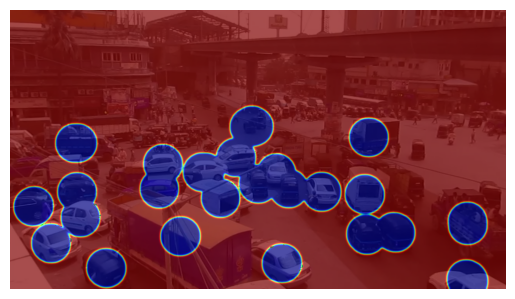


0: 384x640 20 cars, 2 buss, 5 trucks, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


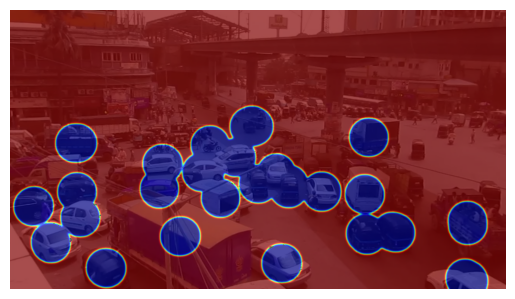


0: 384x640 20 cars, 2 buss, 5 trucks, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


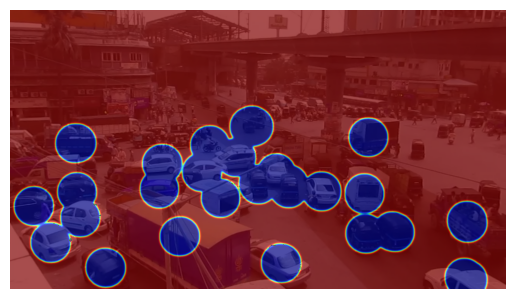


0: 384x640 19 cars, 2 buss, 5 trucks, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


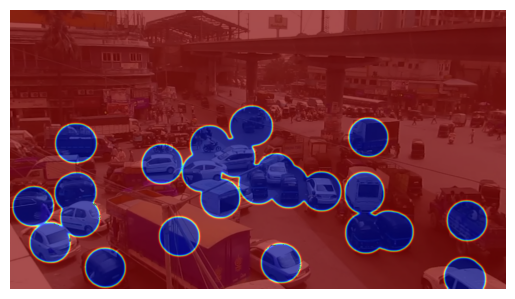


0: 384x640 20 cars, 2 buss, 5 trucks, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


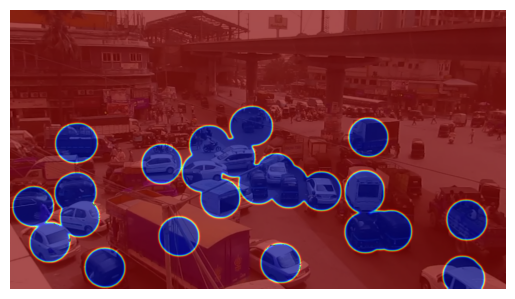


0: 384x640 18 cars, 2 buss, 5 trucks, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


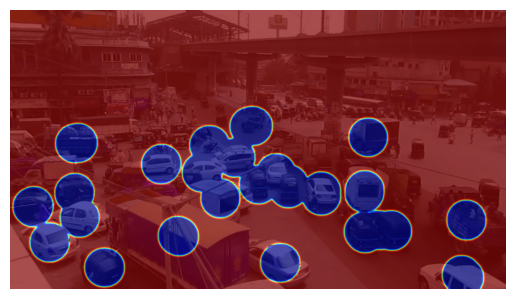


0: 384x640 20 cars, 2 buss, 5 trucks, 14.3ms
Speed: 3.9ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


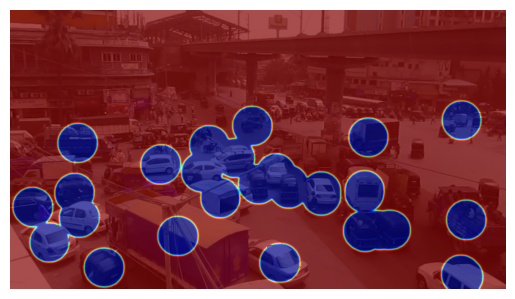


0: 384x640 18 cars, 3 buss, 5 trucks, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


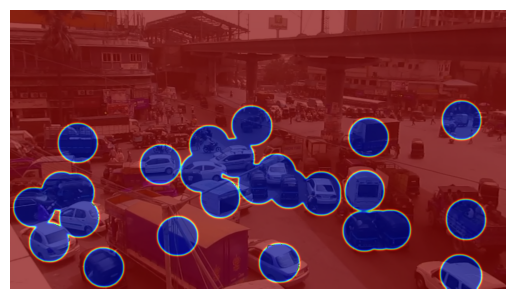


0: 384x640 21 cars, 3 buss, 5 trucks, 20.4ms
Speed: 2.0ms preprocess, 20.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


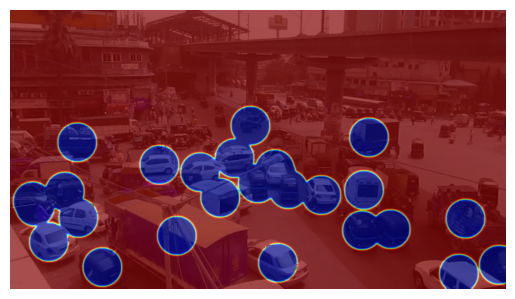


0: 384x640 22 cars, 2 buss, 5 trucks, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


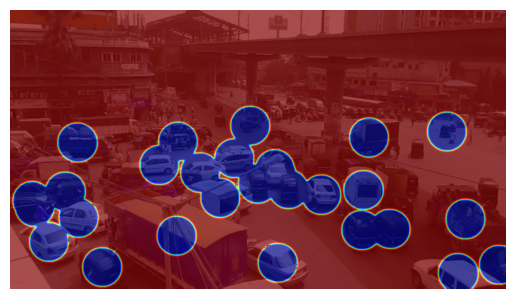


0: 384x640 21 cars, 1 bus, 5 trucks, 14.4ms
Speed: 2.1ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


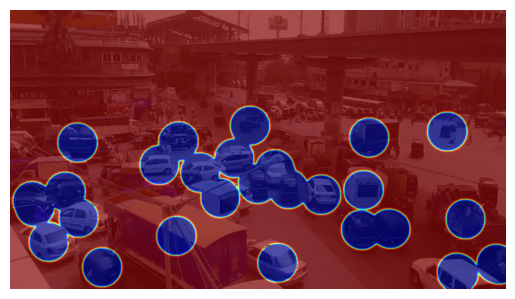


0: 384x640 19 cars, 1 bus, 5 trucks, 16.3ms
Speed: 8.9ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


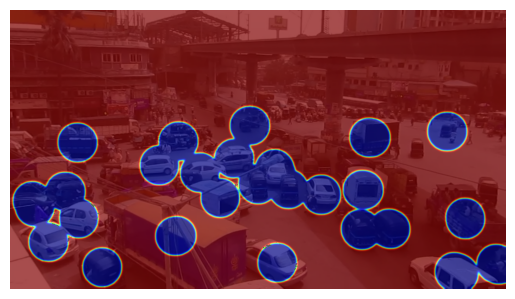


0: 384x640 19 cars, 1 bus, 5 trucks, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


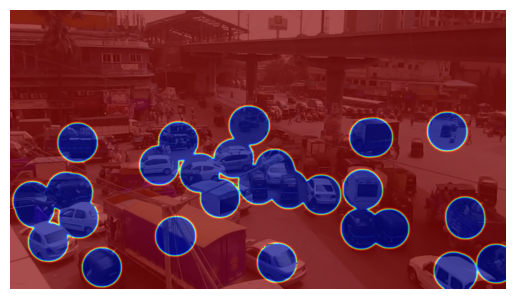


0: 384x640 19 cars, 5 trucks, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


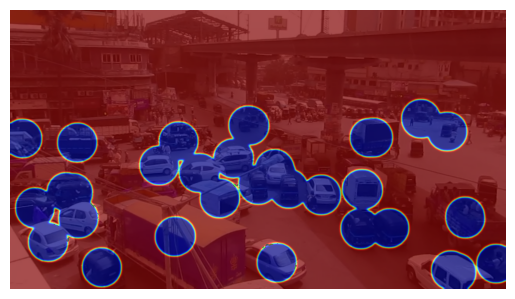


0: 384x640 19 cars, 5 trucks, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


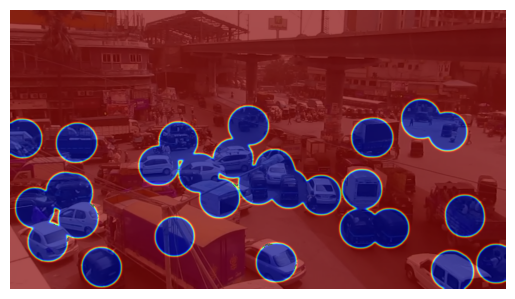


0: 384x640 18 cars, 5 trucks, 22.9ms
Speed: 1.9ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


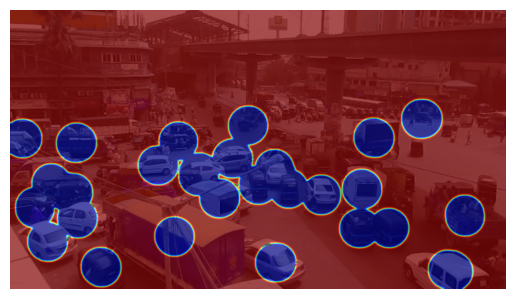


0: 384x640 17 cars, 5 trucks, 16.8ms
Speed: 2.2ms preprocess, 16.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


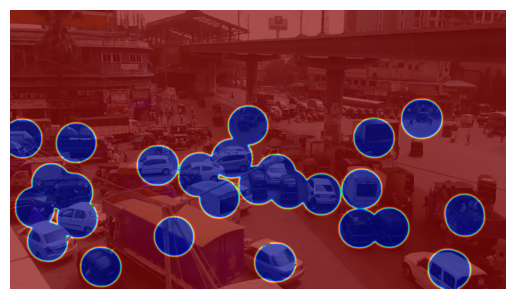


0: 384x640 19 cars, 5 trucks, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


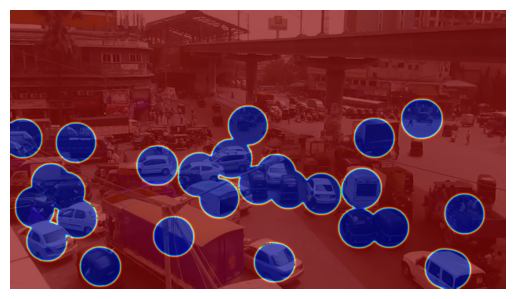


0: 384x640 18 cars, 5 trucks, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


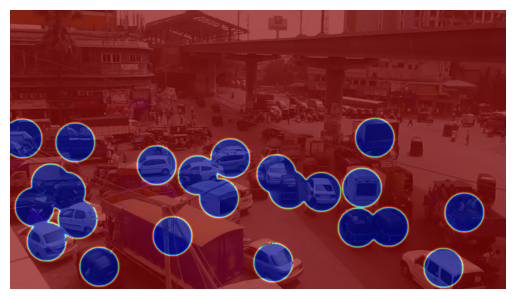


0: 384x640 19 cars, 5 trucks, 14.3ms
Speed: 3.6ms preprocess, 14.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


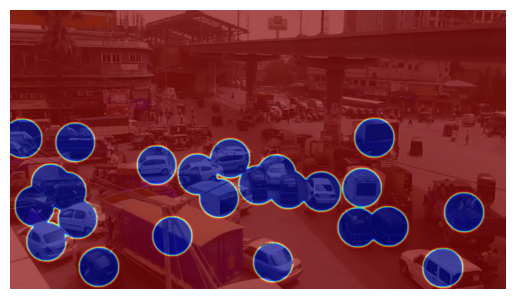


0: 384x640 19 cars, 5 trucks, 14.2ms
Speed: 2.0ms preprocess, 14.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


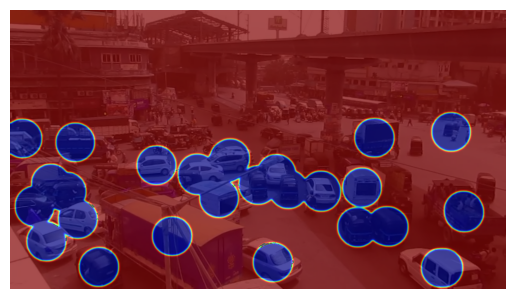


0: 384x640 1 person, 21 cars, 5 trucks, 11.4ms
Speed: 2.3ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


KeyboardInterrupt: 

In [35]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Create a queue to store the detected vehicle locations
vehicle_locations = deque(maxlen=100)

def generate_heatmap(frame, vehicle_locations):
    # Create a blank heatmap
    heatmap = np.zeros_like(frame[:,:,0], dtype=np.float32)

    # Loop through the vehicle locations and draw circles on the heatmap
    for x, y in vehicle_locations:
        cv2.circle(heatmap, (x, y), 50, 1, -1)

    # Apply Gaussian blur to smooth out the heatmap
    heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)

    # Normalize the heatmap
    heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Invert the heatmap
    heatmap = 255 - heatmap

    # Apply colormap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Combine the heatmap with the original frame
    alpha = 0.7
    heatmap_bgr = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    output = cv2.addWeighted(frame, 1 - alpha, heatmap_bgr, alpha, 0)

    return output-255

# Open the video file
cap = cv2.VideoCapture("/content/bombay.mp4")  # Update with your video file path

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(cap.get(3)),int(cap.get(4))))

# Number of frames to accumulate vehicle locations
accumulation_frames = 10
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Detect vehicles in the frame using YOLOv8
    results = model(frame)
    boxes = results[0].boxes

    # Clear the previous vehicle locations every accumulation_frames
    if frame_count % accumulation_frames == 0:
        vehicle_locations.clear()

    # Loop through the detected vehicles and store their locations
    for box in boxes:
        if box.cls == 2 or box.cls == 7:  # Class 2: Car, Class 7: Truck
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            vehicle_locations.append((center_x, center_y))

    # Generate the heatmap with wavy regions and display the output
    output = generate_heatmap(frame, vehicle_locations)
    plt.imshow(output)
    plt.axis('off')
    plt.show()
    out.write(output) # write the frame to output video

    frame_count += 1

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Create a queue to store the detected vehicle locations
vehicle_locations = deque(maxlen=100)

def generate_heatmap(frame, vehicle_locations):
    # Create a blank heatmap
    heatmap = np.zeros_like(frame[:,:,0], dtype=np.float32)

    # Loop through the vehicle locations and draw wavy rectangular regions on the heatmap
    for x, y, w, h in vehicle_locations:
        angle = np.pi / 4
        for i in range(x, x + w):
            for j in range(y, y + h):
                dx = i - x - w / 2
                dy = j - y - h / 2
                r = np.sqrt(dx**2 + dy**2)
                theta = np.arctan2(dy, dx)
                radius = max(w / 2, h / 2) * (1 + 0.2 * np.sin(theta * 4 + angle))
                if r < radius:
                    heatmap[j, i] += 1

    # Apply Gaussian blur to smooth out the heatmap
    heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)

    # Normalize the heatmap
    heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Invert the heatmap
    heatmap = 255 - heatmap

    # Apply colormap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Combine the heatmap with the original frame
    alpha = 0.7
    heatmap_bgr = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    output = cv2.addWeighted(frame, 1 - alpha, heatmap_bgr, alpha, 0)

    return output

# Open the video file
cap = cv2.VideoCapture("/content/bombay.mp4")  # Update with your video file path

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(cap.get(3)),int(cap.get(4))))

# Number of frames to accumulate vehicle locations
accumulation_frames = 10
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Detect vehicles in the frame using YOLOv8
    results = model(frame)
    boxes = results[0].boxes

    # Clear the previous vehicle locations every accumulation_frames
    if frame_count % accumulation_frames == 0:
        vehicle_locations.clear()

    # Loop through the detected vehicles and store their locations
    for box in boxes:
        if box.cls == 2 or box.cls == 7:  # Class 2: Car, Class 7: Truck
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            vehicle_locations.append((center_x, center_y))

    # Generate the heatmap with wavy regions and display the output
    output = generate_heatmap(frame, vehicle_locations)
    plt.imshow(output)
    plt.axis('off')
    plt.show()
    out.write(output) # write the frame to output video

    frame_count += 1

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'ultralytics'

In [6]:
import folium
from folium.plugins import HeatMap

# Function to interpolate points for smoother tracks
def interpolate_points(track_data, num_interpolations=10):
    interpolated_track = []
    for i in range(len(track_data) - 1):
        lat1, lon1 = track_data[i]
        lat2, lon2 = track_data[i + 1]
        for j in range(num_interpolations):
            lat = lat1 + (lat2 - lat1) * j / num_interpolations
            lon = lon1 + (lon2 - lon1) * j / num_interpolations
            interpolated_track.append([lat, lon])
    return interpolated_track

# create a map object
mapObj = folium.Map([24.2170111233401, 81.0791015625000], zoom_start=6)

# data for multiple vehicle tracks within a city
track_data1 = [
    [24.399, 80.142],
    [22.252, 80.885],
    [24.311, 80.543],
    [23.195, 82.994],
    [23.431, 80.427],
]

track_data2 = [
    [26.363, 81.791],
    [22.942, 83.257],
    [23.751, 79.995],
    [23.215, 81.004],
    [24.541, 79.889]
]

# interpolate points for smoother tracks
interpolated_track1 = interpolate_points(track_data1)
interpolated_track2 = interpolate_points(track_data2)

# combine all interpolated track data
all_tracks_data = interpolated_track1 + interpolated_track2

# create heatmap from the combined track data and add to map
HeatMap(all_tracks_data).add_to(mapObj)

# save the map object as html
mapObj.save("output.html")


In [ ]:
import numpy as np

# Define the starting latitude and longitude
start_lat = 37.876495
start_lon = -5.620123

# Define the ending latitude and longitude
end_lat = 37.842592
end_lon = -5.762413

# Define the number of data points (excluding start and end)
num_points = 20

# Generate intermediate points
intermediate_lats = np.linspace(start_lat, end_lat, num_points+2)[1:-1]
intermediate_lons = np.linspace(start_lon, end_lon, num_points+2)[1:-1]

# Combine start, intermediate, and end points
data_single_car = [[start_lat, start_lon]] + list(zip(intermediate_lats, intermediate_lons)) + [[end_lat, end_lon]]


Optimal action for volume (NS=30, EW=50): None


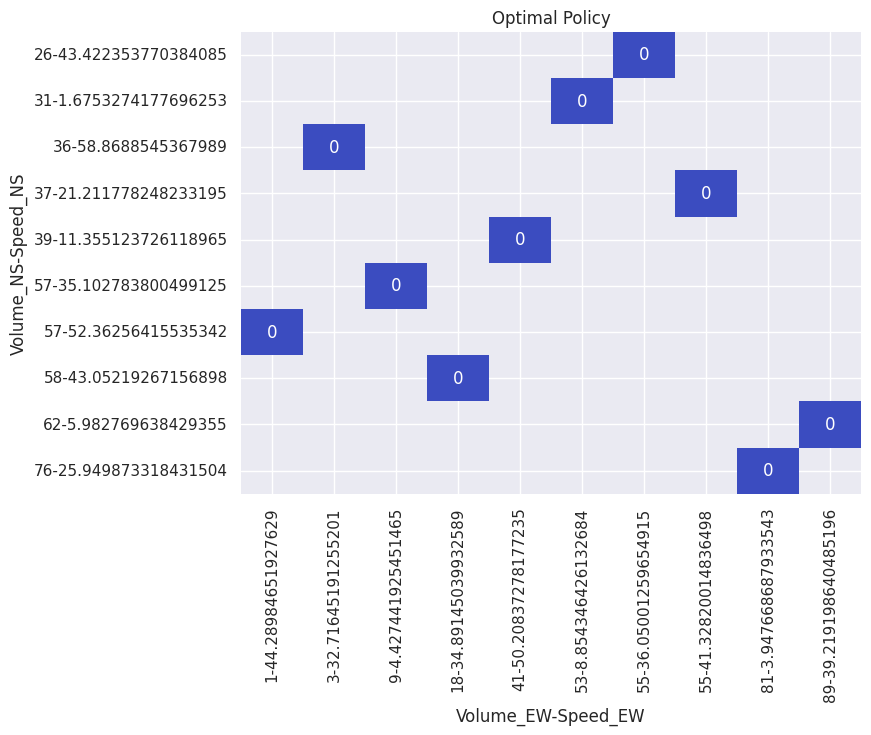

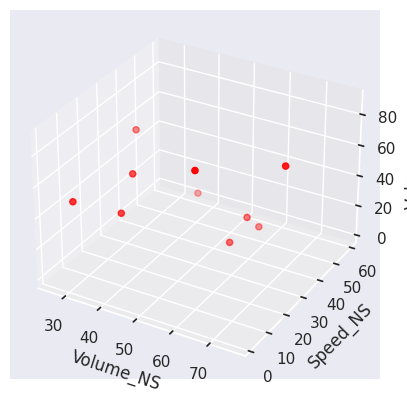

In [17]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for i in range(10):
    volume_NS = random.randint(0, 100)
    speed_NS = random.uniform(0, 60)
    volume_EW = random.randint(0, 100)
    speed_EW = random.uniform(0, 60)
    data.append((volume_NS, speed_NS, volume_EW, speed_EW))

states = set(data)
actions = {'green for NS direction', 'green for EW direction'}

transitions = {}
for state in states:
    for action in actions:
        next_states = []
        if action == 'green for NS direction':
            for next_state in states:
                if next_state[0] >= state[0] and next_state[1] >= state[1] and next_state[2] <= state[2] and next_state[3] <= state[3]:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            transitions[(state, action, next_state)] = p
        elif action == 'green for EW direction':
            for next_state in states:
                if next_state[2] >= state[2] and next_state[3] >= state[3] and next_state[0] <= state[0] and next_state[1] <= state[1]:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            transitions[(state, action, next_state)] = p

rewards = {}
for state in states:
    for action in actions:
        next_states = []
        if action == 'green for NS direction':
            for next_state in states:
                if next_state[0] >= state[0] and next_state[1] >= state[1] and next_state[2] <= state[2] and next_state[3] <= state[3]:
                    next_states.append(next_state)
            for next_state in next_states:
                r = 10
                if next_state[2] > state[2] or next_state[3] > state[3]:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                rewards[(state, action, next_state)] = r
        elif action == 'green for EW direction':
            for next_state in states:
                if next_state[2] >= state[2] and next_state[3] >= state[3] and next_state[0] <= state[0] and next_state[1] <= state[1]:
                    next_states.append(next_state)
            for next_state in next_states:
                r = 10
                if next_state[0] > state[0] or next_state[1] > state[1]:
                    r -= 10
                r -= next_state[2] * 0.1
                r -= next_state[3] * 0.01
                rewards[(state, action, next_state)] = r

gamma = 0.8
convergence_threshold = 0.0001
V = {state: 0 for state in states}
while True:
    delta = 0
    for state in states:
        v = V[state]
        max_value = float('-inf')
        for action in actions:
            action_value = 0
            for next_state, probability in transitions.get((state, action), {}).items():
                action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
            if action_value > max_value:
                max_value = action_value
                best_action = action
        V[state] = max_value
        delta = max(delta, abs(v - V[state]))
    if delta < convergence_threshold:
        break

# Extract the optimal policy
policy = {}
for state in states:
    max_value = float('-inf')
    for action in actions:
        action_value = 0
        for next_state, probability in transitions.get((state, action), {}).items():
            action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
        if action_value > max_value:
            max_value = action_value
            best_action = action
    policy[state] = best_action

def get_optimal_action(volume_NS, volume_EW):
    max_value = float('-inf')
    best_action = None
    for speed_NS in np.linspace(0, 60, 11):
        for speed_EW in np.linspace(0, 60, 11):
            state = (volume_NS, speed_NS, volume_EW, speed_EW)
            if state in states:
                for action in actions:
                    action_value = 0
                    for next_state, probability in transitions.get((state, action), {}).items():
                        action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
                    if action_value > max_value:
                        max_value = action_value
                        best_action = action

# Example usage:50
print("Optimal action for volume (NS=30, EW=50):", get_optimal_action(50,30 ))

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume_NS', 'Speed_NS', 'Volume_EW', 'Speed_EW', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume_NS'] = state[0]
    df.loc[i, 'Speed_NS'] = state[1]
    df.loc[i, 'Volume_EW'] = state[2]
    df.loc[i, 'Speed_EW'] = state[3]
    df.loc[i, 'Optimal Action'] = policy[state]

action_map = {'green for NS direction': 0, 'green for EW direction': 1}
df['Optimal Action'] = df['Optimal Action'].map(action_map)

pivot = df.pivot_table(values='Optimal Action', index=['Volume_NS', 'Speed_NS'], columns=['Volume_EW', 'Speed_EW'])

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, cbar=False)
plt.title('Optimal Policy')
plt.show()

# Create a 3D scatter plot
x = df['Volume_NS']
y = df['Speed_NS']
z = df['Volume_EW']
w = df['Speed_EW']
colors = ['green' if a == 'green for NS direction' else 'red' for a in df['Optimal Action']]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors)

ax.set_xlabel('Volume_NS')
ax.set_ylabel('Speed_NS')
ax.set_zlabel('Volume_EW')

plt.show()


In [ ]:
@2